In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("dados_vendas.csv")

In [8]:
#Informando numeros de linhas e colunas que formam o DataFrame
df.shape

(365, 5)

O DataFrame gerado possui 365 linhas e 5 colunas.

In [9]:
#Informando os tipos de dados das colunas que compõem o DataFrame.
df.dtypes

Data                   object
Categoria              object
Quantidade_Vendida      int64
Preco_Unitario        float64
Valor_Total           float64
dtype: object

O DataFrame possui as colunas Data e Categoria com dados do tipo object. A coluna Quantidade_Vendida é composta por dados do tipo inteiro e as colunas Preco_Unitario e Valor_Total são formadas por dados do tipo ponto flutuante.

In [11]:
#Exibindo as 5 primeiras linhas do DataFrame
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


In [12]:
eletronicos = df[df['Categoria'] == 'Eletrônicos']

In [13]:
eletronicos

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
5,2023-07-08,Eletrônicos,73,256.12,18696.76
6,2023-01-21,Eletrônicos,1,274.53,274.53
7,2023-04-13,Eletrônicos,51,248.32,12664.32
14,2023-06-01,Eletrônicos,34,303.52,10319.68
18,2023-09-15,Eletrônicos,39,121.40,4734.60
...,...,...,...,...,...
347,2023-09-10,Eletrônicos,33,431.46,14238.18
349,2023-09-13,Eletrônicos,27,201.67,5445.09
351,2023-05-08,Eletrônicos,29,243.57,7063.53
353,2023-10-08,Eletrônicos,57,427.57,24371.49


In [25]:
media = eletronicos['Valor_Total'].mean()

In [26]:
media

np.float64(12291.256301369864)

A média do valor total das vendas na categoria 'Eletrônicos' é de 12291.26

In [27]:
vendas_acima_1000 = df[df['Valor_Total'] > 1000]

In [28]:
vendas_acima_1000

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
358,2023-12-26,Brinquedos,68,147.88,10055.84
359,2023-06-23,Alimentos,86,133.80,11506.80
361,2023-04-24,Brinquedos,10,350.90,3509.00
363,2023-12-08,Brinquedos,74,270.98,20052.52


In [30]:
vendas_acima_1000.shape

(330, 5)

Foram registradas 330 vendas com valor total maior que 1000.

In [31]:
total_por_categoria = df.groupby('Categoria')['Valor_Total'].sum().reset_index()

In [32]:
total_por_categoria

,Categoria,Valor_Total
0,Alimentos,742457.74
1,Brinquedos,1187964.04
2,Eletrônicos,897261.71
3,Livros,963685.46
4,Roupas,991215.29


A categoria Brinquedos apresentou o maior valor total de vendas.

In [33]:
media_quantidade_categoria = df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()

In [34]:
media_quantidade_categoria

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182
1,Brinquedos,47.247191
2,Eletrônicos,46.780822
3,Livros,50.917808
4,Roupas,47.200000


A categoria Alimentos teve a maior quantidade média vendida.

In [35]:
import matplotlib.pyplot as plt 


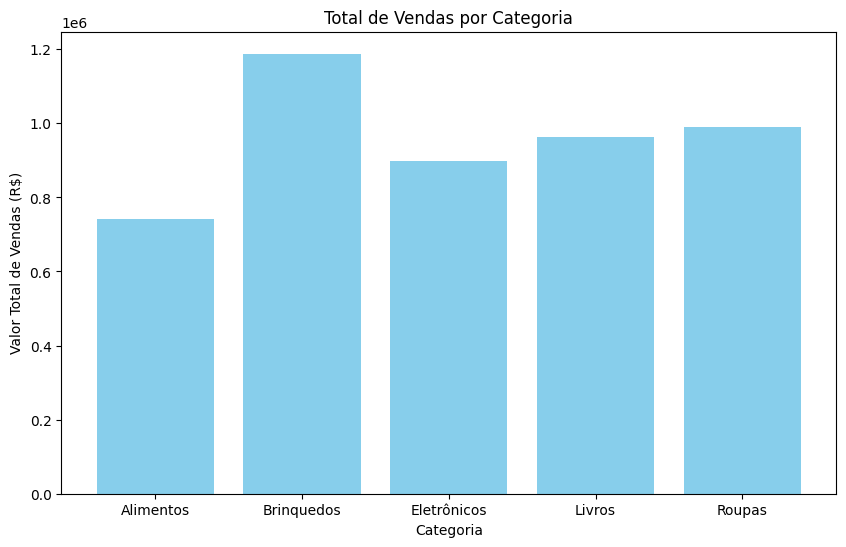

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(total_por_categoria['Categoria'], total_por_categoria['Valor_Total'], color='skyblue')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

Com base na visualização do gráfico, a Categoria Brinquedos apresentou o maior valor total de vendas.

In [37]:
vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()


In [38]:
vendas_diarias

,Data,Valor_Total
0,2023-01-09,15198.60
1,2023-01-21,274.53
2,2023-01-27,12175.60
3,2023-02-05,21956.48
4,2023-02-06,9625.70
...,...,...
59,2023-11-23,12677.00
60,2023-12-04,6724.81
61,2023-12-12,6993.20
62,2023-12-25,14750.80


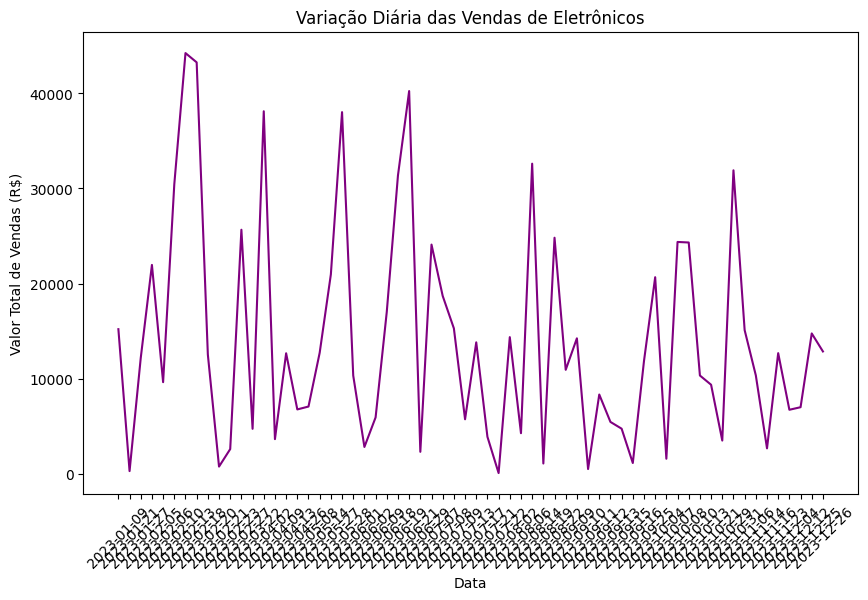

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='purple')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

Visualizando o gráfico é possível inferir que existe uma enorme variação na venda total diária de eletronicos: dias de pico extremamente elevado de vendas, enquanto em outros dias uma acentuada baixa no volume de vendas. É recomendável que seja feita uma diluição na visualização dos dados, ou seja, gráficos apresentados semanalmente, com o intuito de diagnosticar, com mais precisão e confiabilidade, os motivos que contribuem para esse historico de vendas tão irregular.